#### Import Important Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
import fastapi
import pydantic
import zipfile
from zipfile import ZipFile


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Dataset: red-wine.csv Libraries Allowed: pandas, numpy, matplotlib, seaborn, scikit-learn, joblib, fastapi, uvicorn, pydantic

Case Scenario
You are a Data Scientist working with a wine production company. The company wants to predict the quality class of red wine based on its chemical composition. You are required to build, evaluate, and deploy a classification model that estimates wine quality and helps producers make data-driven production decisions.

from https://archive.ics.uci.edu/static/public/186/wine+quality.zip.
Select the winequality-white.csvfile. Load it as white-wine.csv..



#### 1. Preliminary Data Analysis and Cleaning

In [5]:
# Load the dataset
path = r"wine+quality.zip"

# unzip the file
def check_data(path):
  print(f"unzipping data....")
  with ZipFile(path, "r") as f:
    f.printdir()

# function to load white wine
def load_data(path):
  with ZipFile(path, "r") as zip_data:
    with zip_data.open("winequality-white.csv") as f:
      data = pd.read_csv(f, sep=";")
      return data


In [6]:
check_data(path)

unzipping data....
File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [7]:
load_data(path)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
data = load_data(path)

#### 2. Display the first 6 rows and dataset shape

In [9]:
def display_dataset(data, target = 'quality'):
    display(data.head(6))
    print(f"The first 6 rows of the dataset are:\n{data.head(6)}")
    print(f"The dataset shape is:\n{data.shape}")
    

In [10]:
display_dataset(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


The first 6 rows of the dataset are:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0  

#### 3. Check for missing values and handle them appropriately

In [11]:
# Check for missing values and handle them appropriately
def missing():
    missing_values = data.isna().sum()

    if missing_values.sum() > 0:
        print(missing_values[missing_values] > 0)
    
    else:
        print("No missing values in our dataset")

In [12]:
missing()

No missing values in our dataset


#### 4. Check for duplicates and remove them if necessary

In [13]:
# Check for duplicates
def check_duplicates(data):
    duplicate = data.duplicated().sum()
    if duplicate > 0:
        print(f"There are {duplicate} duplicate rows in the dataset")
    else:
        print("No duplicate rows in the dataset")

check_duplicates(data)


There are 937 duplicate rows in the dataset


In [14]:
# Lets handle the duplicate
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
check_duplicates(data)

No duplicate rows in the dataset


5. Verify datatype and correct them if needed 

In [31]:
# Verify datatype and correct them if needed 
def check_datatype(data):
    print("Data types of each column:")
    return data.dtypes
check_datatype(data)

Data types of each column:


fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

#### 2. Exploratory Data Analysis and Scaling

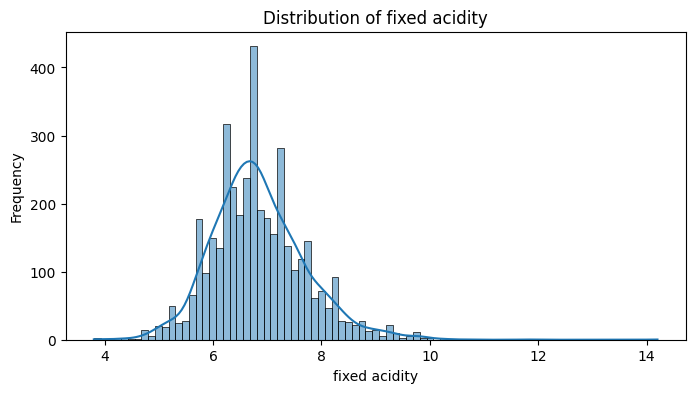

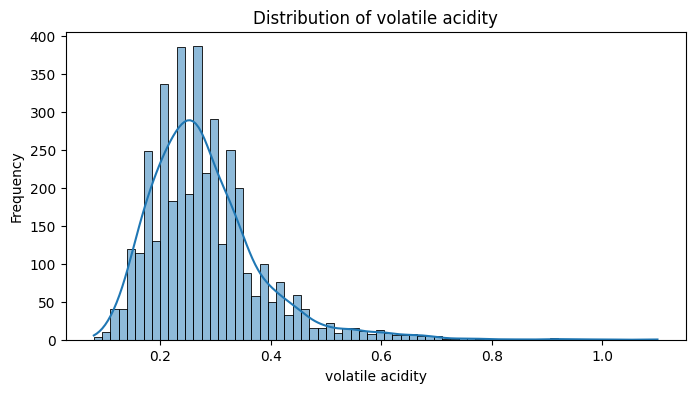

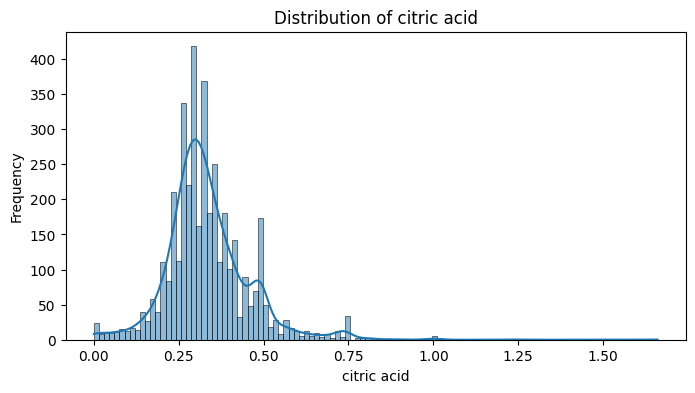

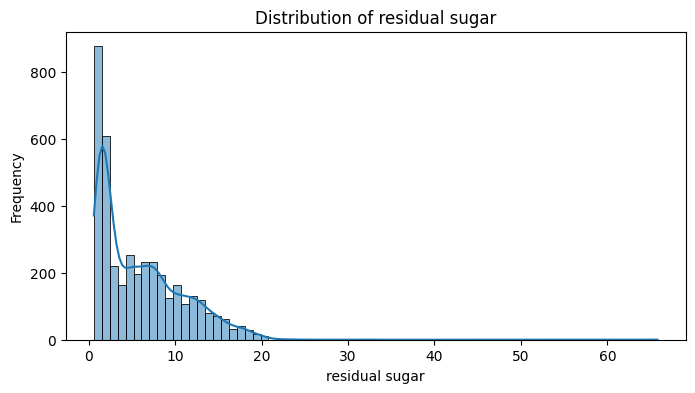

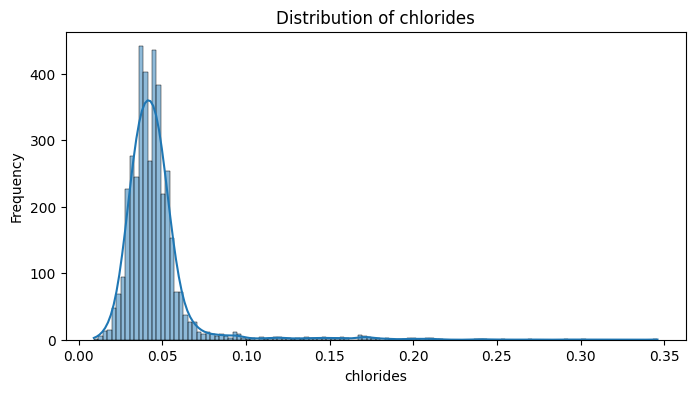

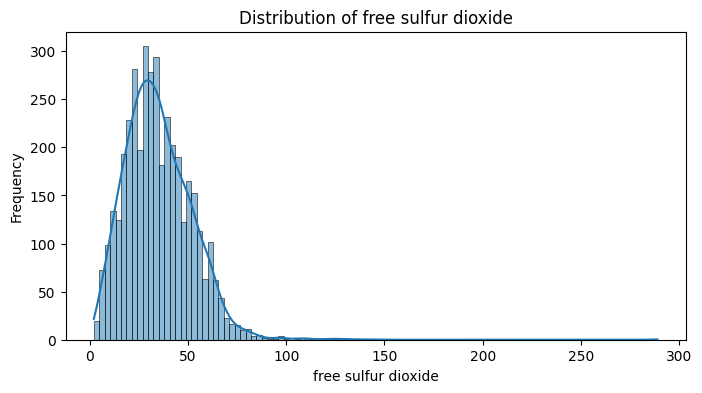

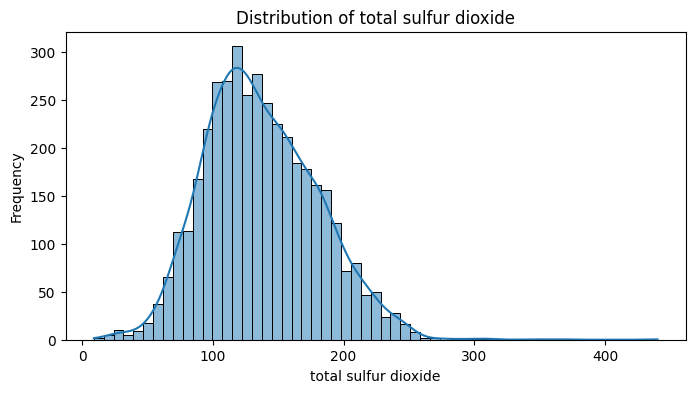

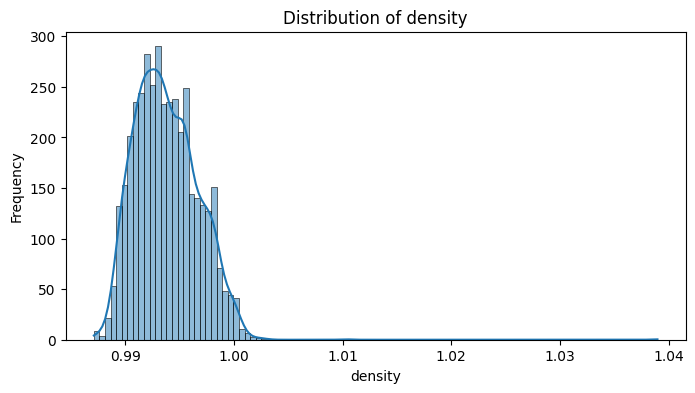

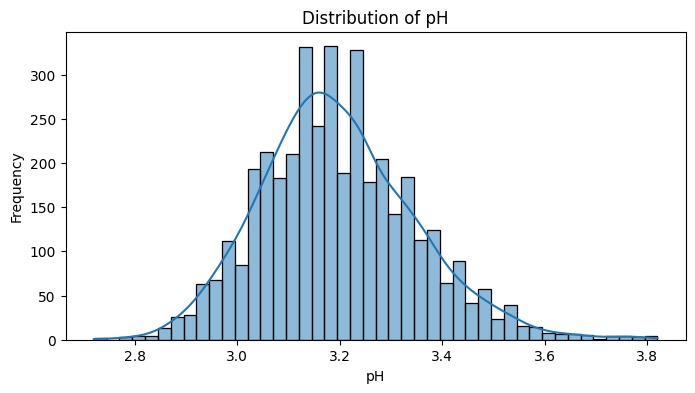

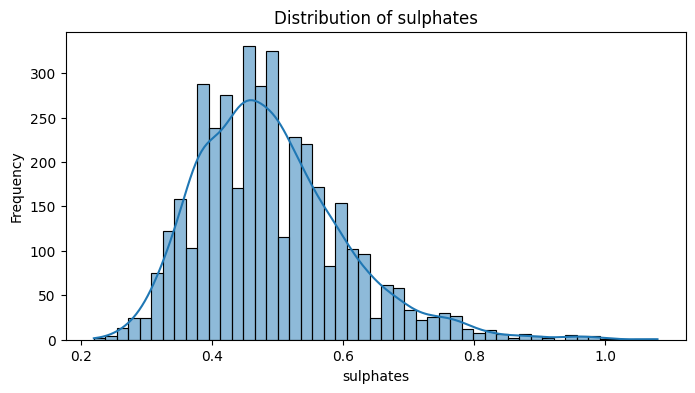

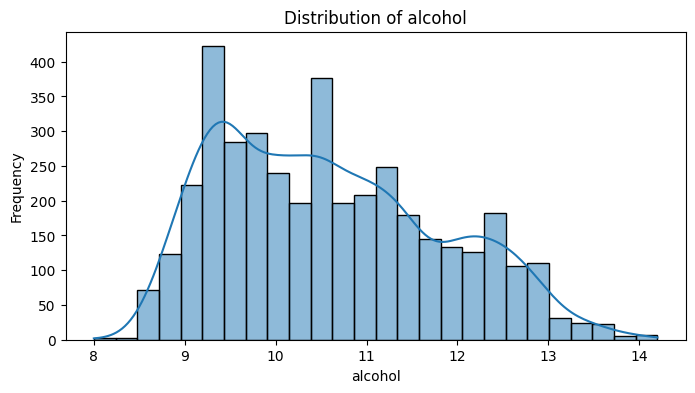

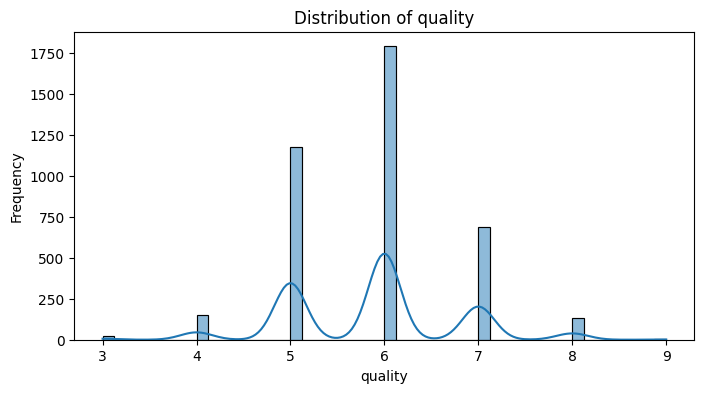

In [16]:
def univariate_analysis(data):
    for column in data.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
univariate_analysis(data)


Correlation of each feature with the target variable 'quality':
quality                 1.000000
alcohol                 0.462869
pH                      0.123829
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
residual sugar         -0.117339
fixed acidity          -0.124636
total sulfur dioxide   -0.183356
volatile acidity       -0.190678
chlorides              -0.217739
density                -0.337805
Name: quality, dtype: float64


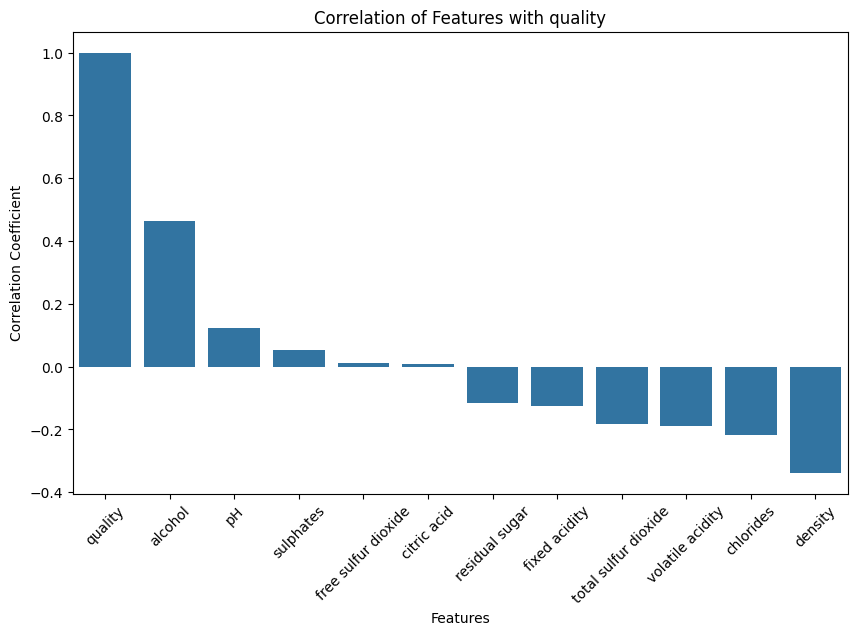

In [17]:
# Examine the correlation of each feature with the target variable('quality)
def correlation_with_target(data, target='quality'):
    correlations = data.corr()[target].sort_values(ascending=False)
    print(f"Correlation of each feature with the target variable '{target}':\n{correlations}")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlations.index, y=correlations.values)
    plt.title(f'Correlation of Features with {target}')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.show()

correlation_with_target(data)

In [18]:
# Map the quality column into categorical casses as follows: 9-8 Best, 7-6 Good, 5 Average, 4-3 Bad

def map_quality(data):
    bins = [0, 3, 5, 7, 10]
    labels = ['Bad', 'Average', 'Good', 'Best']
    data['quality'] = pd.cut(data['quality'], bins=bins, labels=labels, right=False)

    print("Mapped quality column into categorical classes.")
    return data

data = map_quality(data)

Mapped quality column into categorical classes.


4. Ensure the mapped categorical target is used for all subsequent modeling steps

In [19]:
# Ensure the mapped categorical target is used for all subsequent modeling steps
# Lets check 
data.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

5. Split the dataset into features X and target Y

In [20]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Good


5. Split the dataset into features x and target y

In [21]:
# Split the dataset into features x and target y
X = data.drop(columns="quality")
y = data['quality']


6. Apply appropriate scaling to all numerical features

In [36]:
# Apply appropriate scaling to all numerical features

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#### 3. Build a Base Classification Model

1. split the data into training and testing sets (e.g., 80/20)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state= 234)

print(f"Training shape: {X_train.shape} ")
print(f"Test Shape: {X_test.shape}")


Training shape: (3168, 11) 
Test Shape: (793, 11)


In [38]:
# Train a simple model such as LogisticRegression or DecisionTreeClassifier
model = {
    "Logistic Regression": LogisticRegression()
   
}

Training Logistic Regression
Logistic Regression Accuracy: 0.7919293820933165


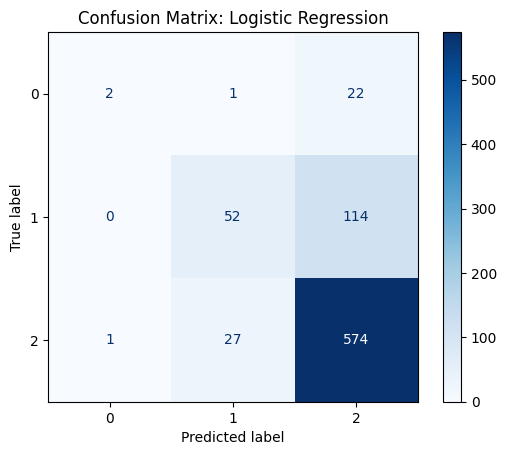

In [39]:
# Initialize a dictionary to store the models
results = {}

for model_name, model in model.items():
    
    print(f"Training {model_name}")

    # Train the model
    model.fit(X_train, y_train)

    # Predict using X_test
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")

    # lets include confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot with model name as title
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')    
    plt.show()

4. Provide a short Interpretation of what the metrics mean in relation to the model's predictive ability

The Accuracy output was 0.7919 which means that Logistic Regression model correctly predicted the class label gor 79.19%. 

It shows that the model is performing well and also 20.81 % of its prediction were incorrect.


The Confussion matrix provide the detailed explanation for correct and incorrect predictions for each class. 
Class 2 perfomance was 574 correct: which means the class has highest number of correct prediction.

Class 1  has 114 errors: which means the model struggles with class 1. it has just 52 correct values.

Class 0 hs 2 correct performance.


The Model has a very strong bias towards predicting class 2 over others.

#### 4. Build and Compare Multiple Models


In [40]:
models = {

    "Logistic Regression": LogisticRegression(),
    "SVM" : RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

Training Logistic Regression
Logistic Regression Accuracy: 0.7919293820933165


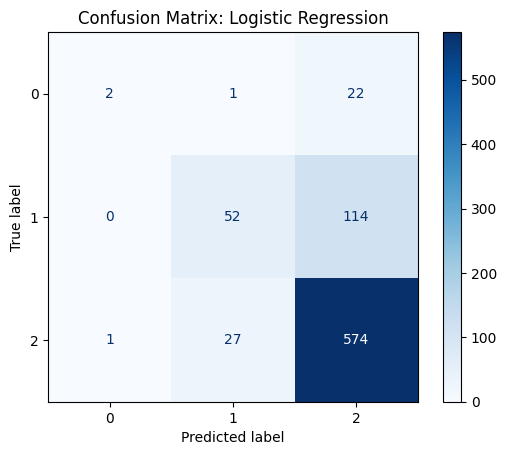

Training SVM
SVM Accuracy: 0.7994955863808323


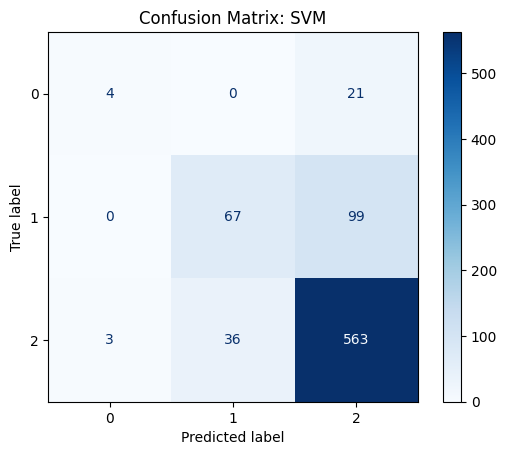

Training Decision Tree
Decision Tree Accuracy: 0.7225725094577553


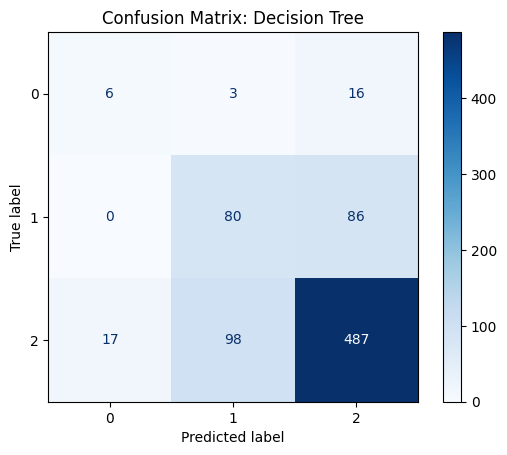

Training K-Nearest Neighbors
K-Nearest Neighbors Accuracy: 0.7692307692307693


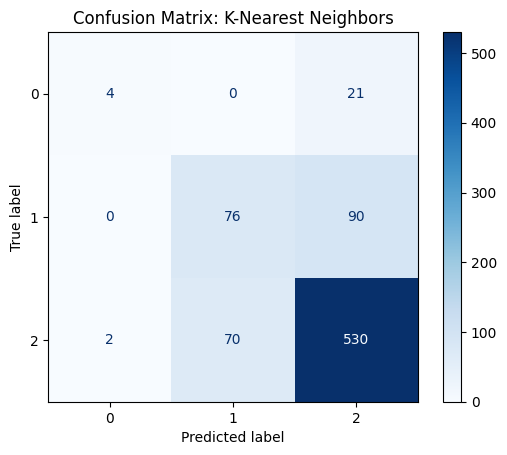

Training Naive Bayes
Naive Bayes Accuracy: 0.6897856242118537


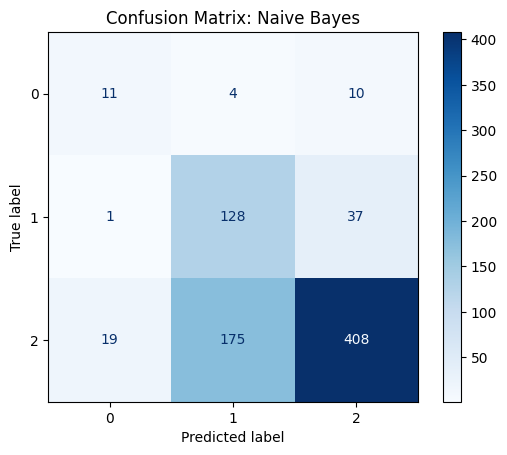

In [41]:
# Initialize a dictionary to store the models
results = {}

for model_name, model in models.items():
    
    print(f"Training {model_name}")

    # Train the model
    model.fit(X_train, y_train)

    # Predict using X_test
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")

    # lets include confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot with model name as title
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')    
    plt.show()

3. Identify and justify which model performs best based on a balance of these metrics


The SVM model has the highest raw accuracy, which is our starting point.
 However, since the dataset appears to be imbalanced (Class 2 has significantly more instances than Class 0 or 1), we must check the confusion matrices to ensure the high accuracy isn't just due to predicting the dominant class correctly most of the time.

 SVM offers the best balance because it provides the highest overall accuracy (0.7995) while maintaining a demonstrably better ability to identify the mid-sized Class 1 (66 TP) compared to its closest rival, Logistic Regression (52 TP). It doesn't over-prioritize the dominant class as much as Logistic Regression does, resulting in a more robust and balanced classifier.

In [42]:
# lets get parameters for Random forest
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
# Lets tune Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# define randomsearch
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=234),
    param_distributions = param_grid
    
)

random_search.fit(X_train, y_train)

Best_Model = random_search.best_estimator_
cv_scores = cross_val_score(Best_Model, X_scaled, y, cv=5)




print(f"cross-validation for RandomForest: {cv_scores}")
print(f"mean cross-validation score: {cv_scores.mean()}")


cross-validation for RandomForest: [0.79066835 0.76136364 0.81439394 0.75126263 0.72979798]
mean cross-validation score: 0.7694973059727158


In [44]:
Best_Model = random_search.best_estimator_
cv_scores = cross_val_score(Best_Model, X_scaled, y, cv=5)


print(f"cross-validation for RandomForest: {cv_scores}")
print(f"mean cross-validation score: {cv_scores.mean()}")

y_pred = Best_Model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))

cross-validation for RandomForest: [0.79066835 0.76136364 0.81439394 0.75126263 0.72979798]
mean cross-validation score: 0.7694973059727158
              precision    recall  f1-score   support

     Average       0.80      0.16      0.27        25
        Best       0.62      0.38      0.47       166
        Good       0.82      0.94      0.87       602

    accuracy                           0.79       793
   macro avg       0.75      0.49      0.54       793
weighted avg       0.78      0.79      0.77       793



In [47]:
joblib.dump(Best_Model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("scaler and best model saved successfully")

scaler and best model saved successfully
